# Energy Efficiency

[Fuente de datos](https://archive.ics.uci.edu/dataset/242/energy+efficiency)

[Listado de repositorios tec](https://experiencia21.tec.mx/courses/530360/pages/evaluacion)

El set de datos contiene 768 registros, con 8 variables independientes y 2 variables dependientes (variables objetivo). Estas variables independientes son los parámetros del edificio. Las variables dependientes son las cargas de calefacción y refrigeración de dichos edificios.



## Descripción del Problema <br>

Según **Energy.gov**, los sistemas de calefacción, ventilación y aire acondicionado (**HVAC**) representan aproximadamente el **35%** del consumo energético de un edificio. Dado que las personas pasan una cantidad significativa de tiempo en interiores, tanto en sus hogares como en lugares de trabajo, es cada vez más importante priorizar diseños que ofrezcan entornos cómodos, rentables y seguros.

El objetivo de nuestro estudio es explorar si el **aprendizaje automático** puede predecir con precisión las cargas de calefacción y enfriamiento basándose en parámetros básicos de construcción, con el propósito de diseñar edificios más eficientes energéticamente. Utilizaremos un conjunto de datos de **UCI**, que incluye cargas conocidas de calefacción (**HL**) y de enfriamiento (**CL**), para examinar la influencia de ocho variables de entrada: **compacidad relativa (X1)**, **área superficial (X2)**, **área de paredes (X3)**, **área del techo (X4)**, **altura total (X5)**, **orientación (X6)**, **área acristalada (X7)** y **distribución del área acristalada (X8)**. Se empleará un modelo de regresión supervisada para predecir las cargas de calefacción y enfriamiento esperadas.

---

### **KPIs:**

- Medición de cargas energéticas: <b>y1 (carga de calefacción)</b> y <b>y2 (carga de enfriamiento)</b><br>
- Carga energética menor a 20 = baja<br>
- Carga energética entre 30 y 40 = media<br>
- Carga energética igual o superior a 40 = alta<br>

---

## Diccionario de Datos <br>

| Columna | Nombre | Tipo de Dato | Descripción |
|---------|--------|--------------|-------------|
| X1 | Compacidad Relativa | float | desconocido <br> |
| X2 | Área Superficial | float | suma de áreas de paredes y techo <br> |
| X3 | Área de Paredes | float | suma de áreas de las paredes <br> |
| X4 | Área del Techo | float | área del techo <br> |
| X5 | Altura Total | float | 1 o 2 pisos de altura <br> |
| X6 | Orientación | int | Norte, Sur, Este, Oeste <br> |
| X7 | Área Acristalada | float | desconocido <br> |
| X8 | Distribución del Área Acristalada | int | desconocido <br> |
| y1 | Carga de Calefacción | float | Coste energético para calentar el edificio <br> |
| y2 | Carga de Enfriamiento | float | Coste energético para enfriar el edificio <br> |

---


**IMPORTACION DE LIBRERIAS**

In [86]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## 1) Lecture de datos

In [87]:
# Getting the root path
path = os.getcwd()  # Obtiene el directorio actual
#parent_path = os.path.dirname(path)  # Retrocede una carpeta
print(f"Directorio padre: {parent_path}")

Directorio padre: /


In [88]:
dataset = pd.read_excel("ENB2012_data.xlsx")
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


**Renaming variables**

In [89]:
dataset.rename(columns={"X1": "Relative_Compactness",
                        "X2": "Surface_Area",
                        "X3": "Wall_Area",
                        "X4": "Roof_Area",
                        "X5": "Overall_Height",
                        "X6": "Orientation",
                        "X7": "Glazing Area",
                        "X8": "Glazing Area Distribution",
                        "Y1": "Heating Load",
                        "Y2": "Cooling Load"
                       }, inplace=True)

dataset.head(n=5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 2) Análisis exploratorio de datos

**TAMAÑO DEL SET DE DATOS**

In [90]:
shape = dataset.shape
shape = {"Cantidad de columnas":[shape[1]],
         "Cantidad de filas":[shape[0]]
         }

# Lo convertimos en una pandas DF
shape = pd.DataFrame(data=shape)
shape

,Cantidad de columnas,Cantidad de filas
0,10,768


### 2.1) Análisis univariable
En esta sección se hará análisis de manera individual a cada una de las variables

#### 2.1.1) Tipo de variables en el set de datos

In [91]:
dataset.dtypes # Podemos observar que  la mayoría de las variables son de tipo flotante. Con excepción a 2 de tipo entero que son la de Orientation y Glazing Area Distribution.

,0
Relative_Compactness,float64
Surface_Area,float64
Wall_Area,float64
Roof_Area,float64
Overall_Height,float64
Orientation,int64
Glazing Area,float64
Glazing Area Distribution,int64
Heating Load,float64
Cooling Load,float64


#### 2.1.2) Estadística descriptiva general

In [92]:
dataset.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


#### 2.1.3) Inspección de registros nulos

In [93]:
dataset.isnull().sum()  # No existen valores nulos

,0
Relative_Compactness,0
Surface_Area,0
Wall_Area,0
Roof_Area,0
Overall_Height,0
Orientation,0
Glazing Area,0
Glazing Area Distribution,0
Heating Load,0
Cooling Load,0


#### 2.1.4) Histograma, distribución de variables

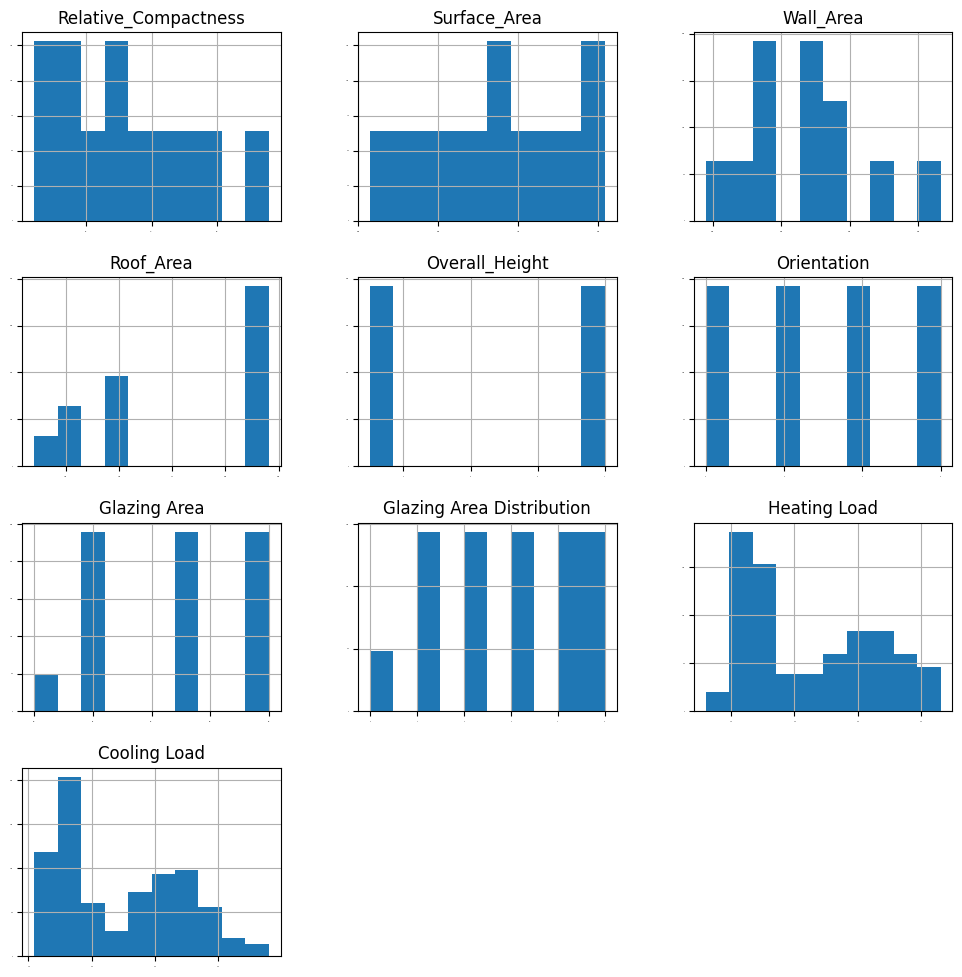

In [94]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

#### 2.1.5) Box plot, distribución de variables

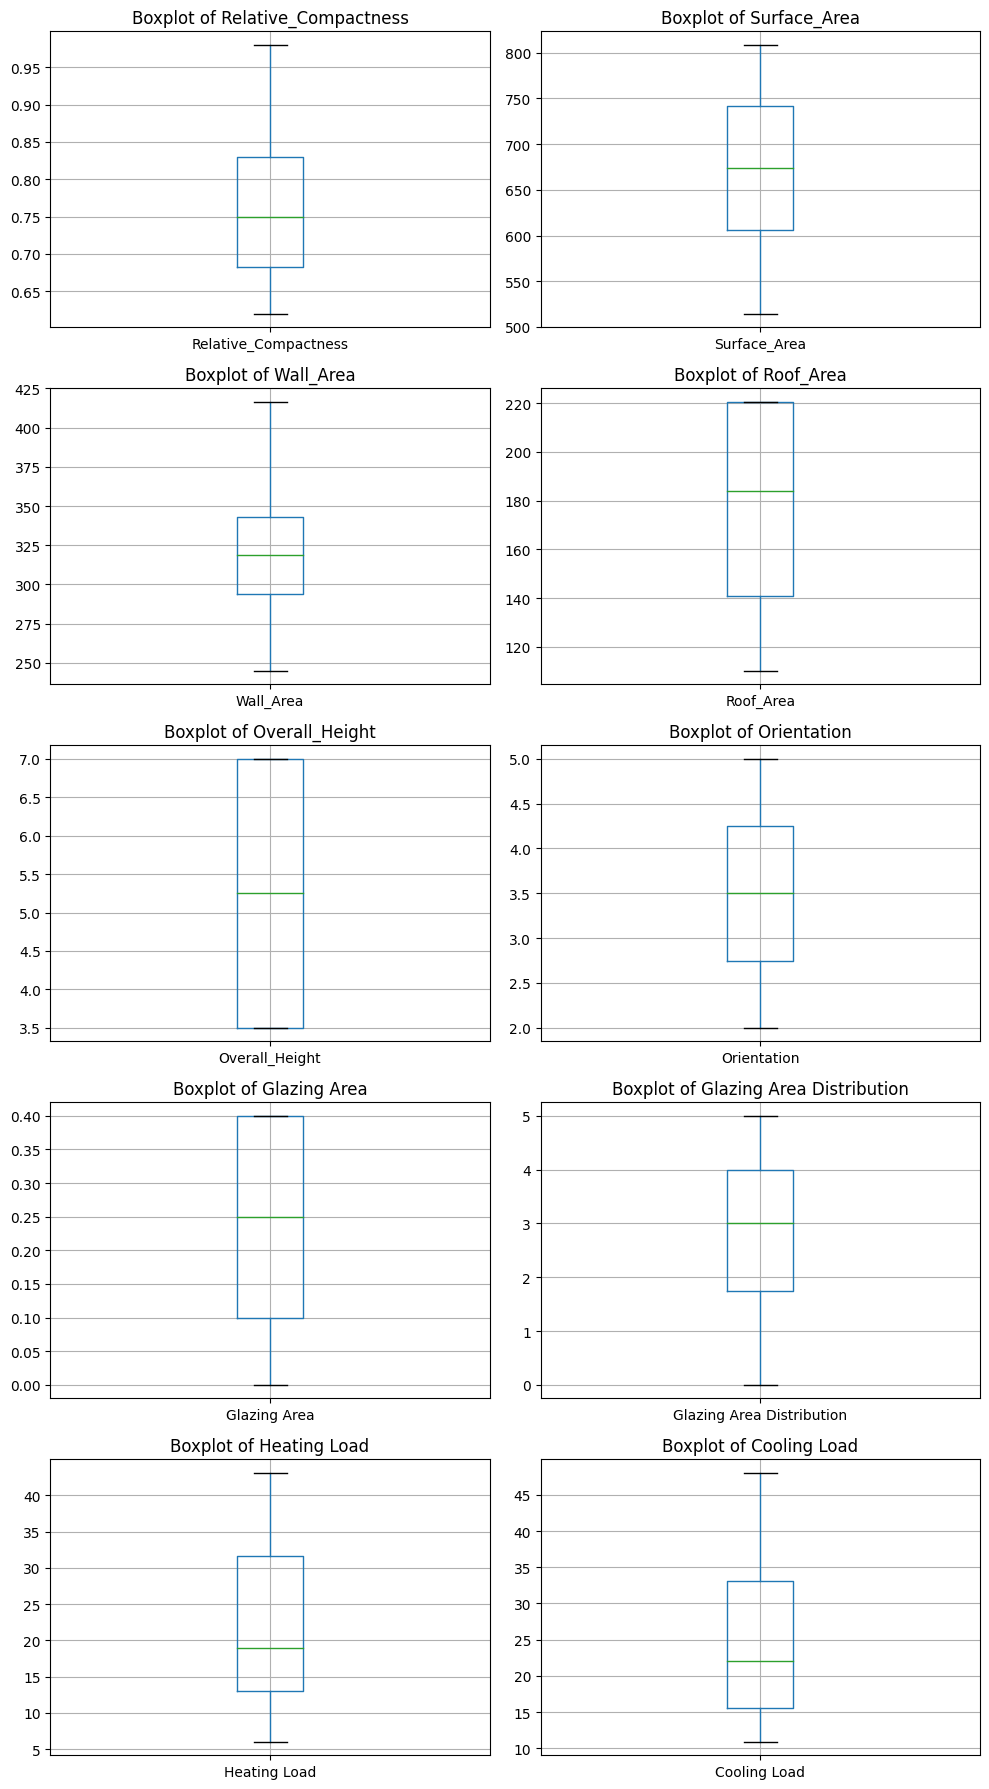

In [95]:
# Boxplot
columns = 2  # Number of plots per row
rows = (len(dataset.columns) + columns - 1) // columns  # Calculate the necessary number of rows

# Create the grid of subplots
fig, axes = plt.subplots(nrows = rows, ncols=columns, figsize=(10, 18))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column's boxplot in its corresponding subplot
for i, col in enumerate(dataset.columns):
    dataset.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots if the number of columns doesn't fit perfectly
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### 2.2) Análisis bivariante
En esta sección se va a analizar relaciones entre 2 variables. Se hará un especial enfasis a la relación que tiene las variables objetivo con las features

#### 2.2.1) Correlación pearson

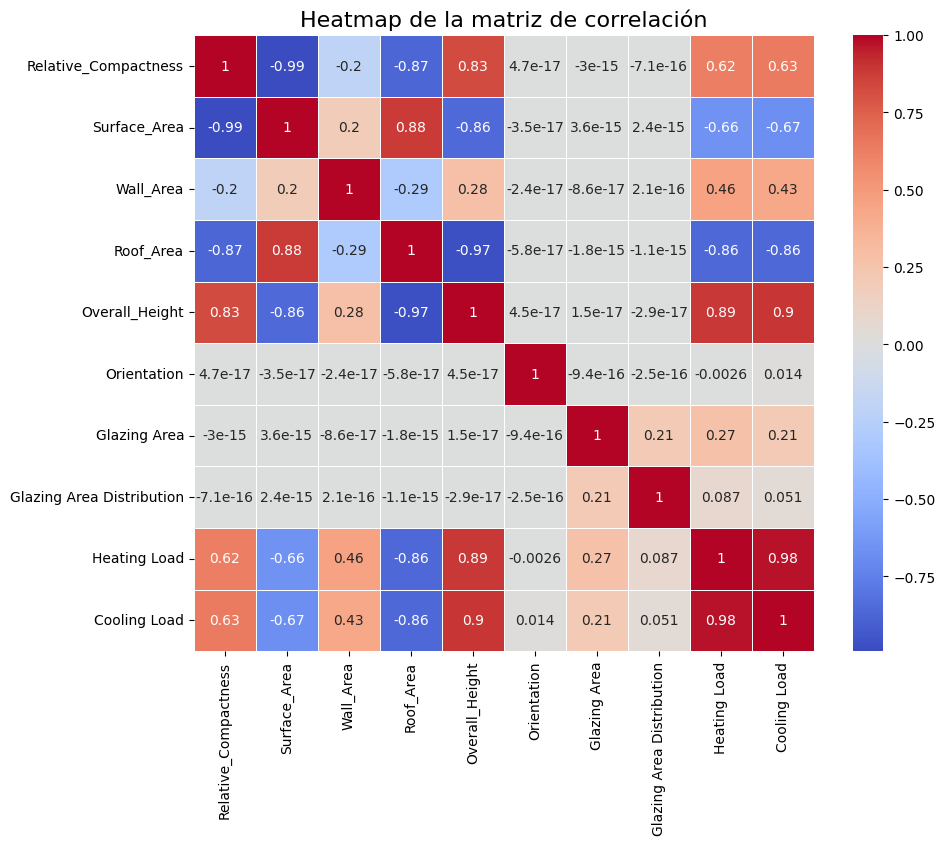

In [96]:
# 1) Definición de la función de correlación entre variables
def heatmap (data:pd.DataFrame, method:str):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Calcular la matriz de correlación
    correlation_matrix = data.corr(method=method)

    # Crear el heatmap
    plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
    sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

    # Agregar un título
    plt.title("Heatmap de la matriz de correlación", fontsize=16)

    # Mostrar el gráfico
    plt.show()

# 2) Ejecución de la función
heatmap(data=dataset, method="pearson")

#### 2.2.2)  Scatterplot
Se crearán un Scatter plot entre las fueatures y las variables objetivo

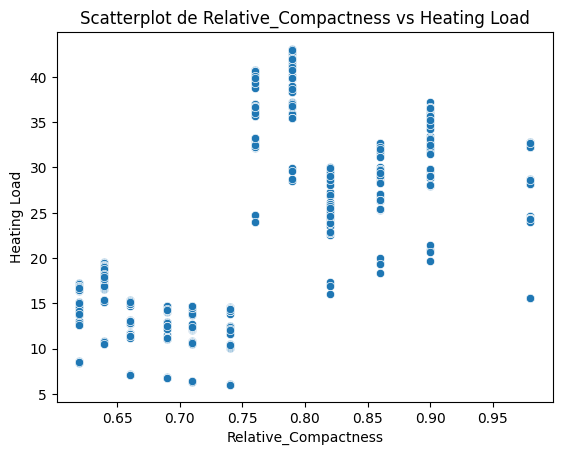

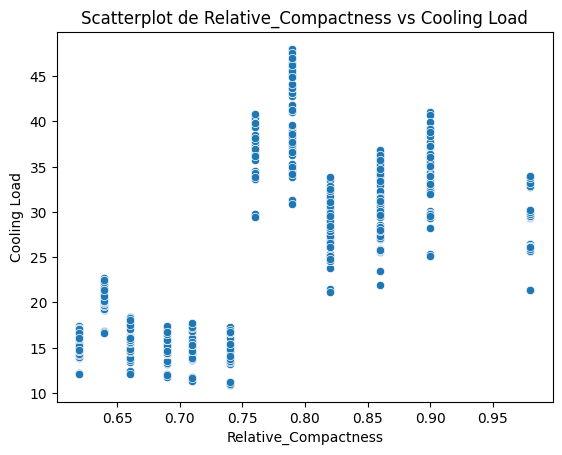

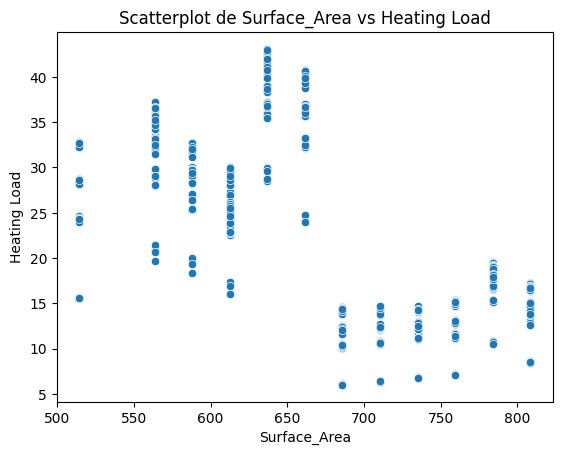

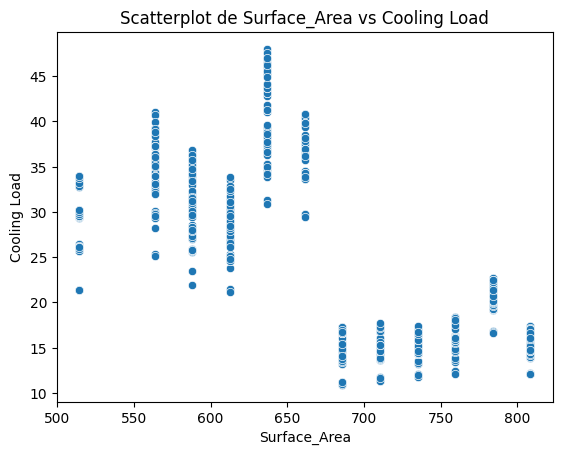

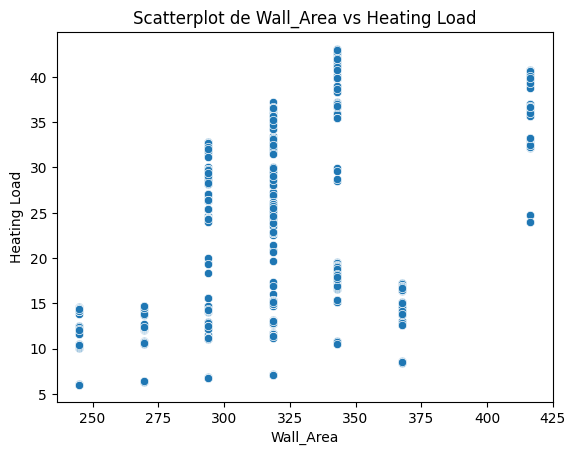

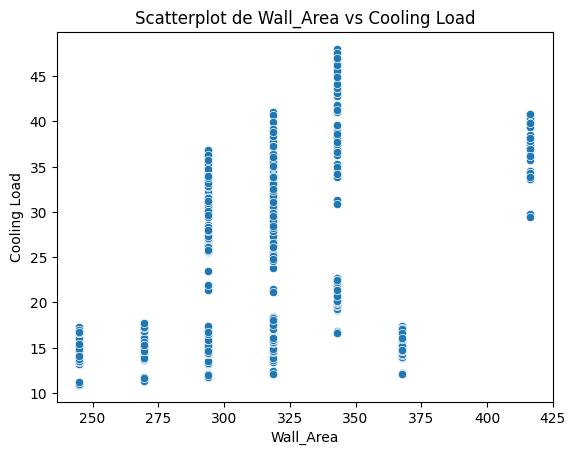

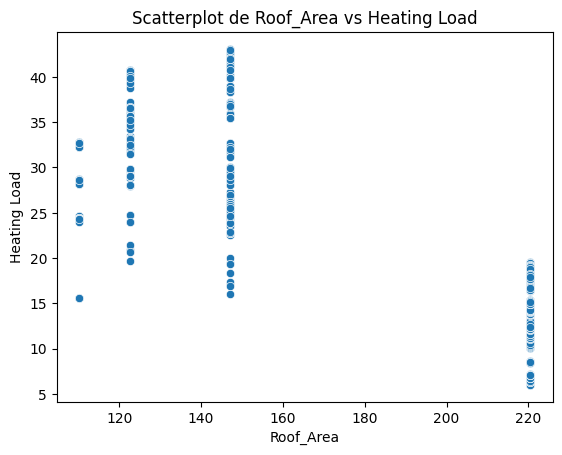

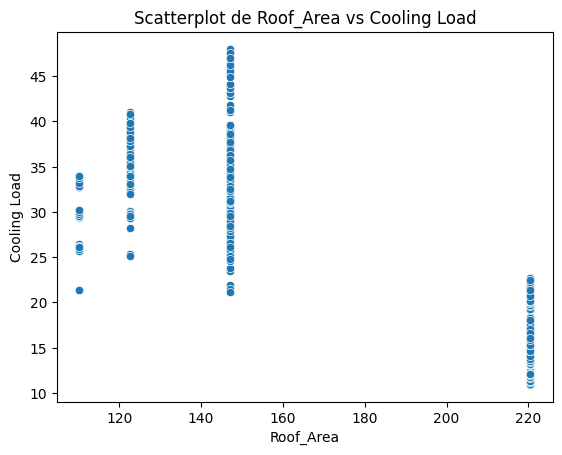

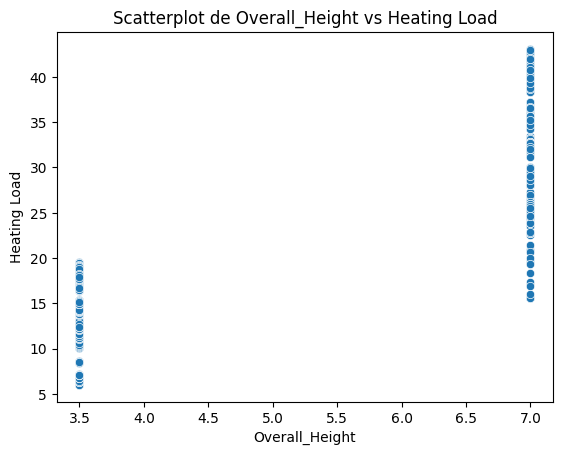

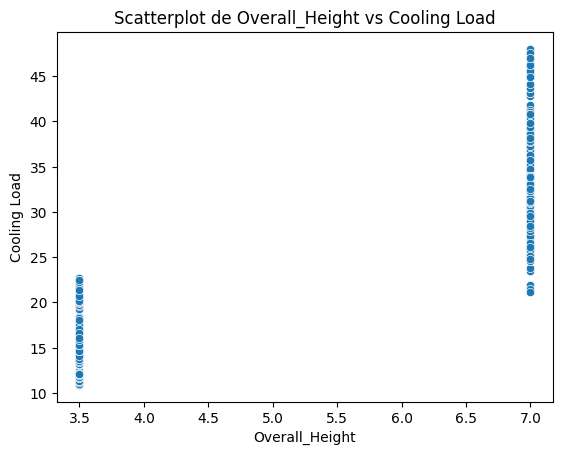

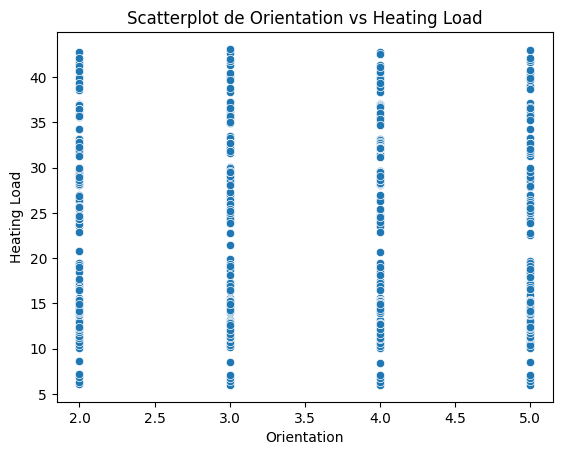

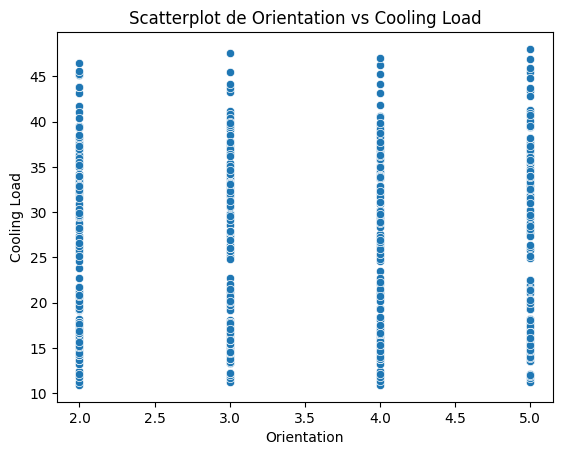

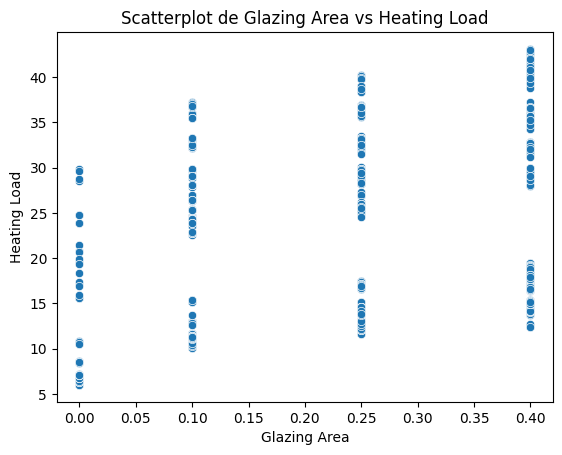

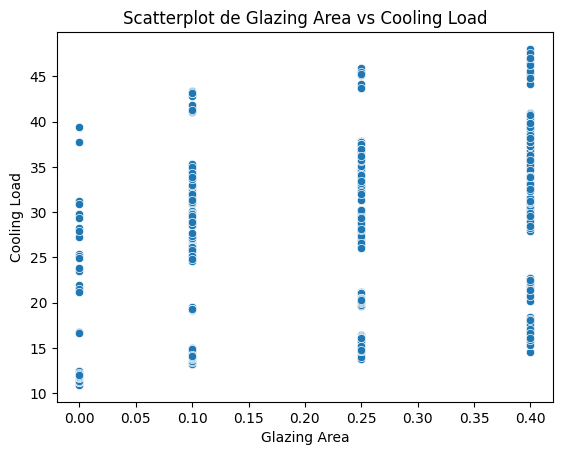

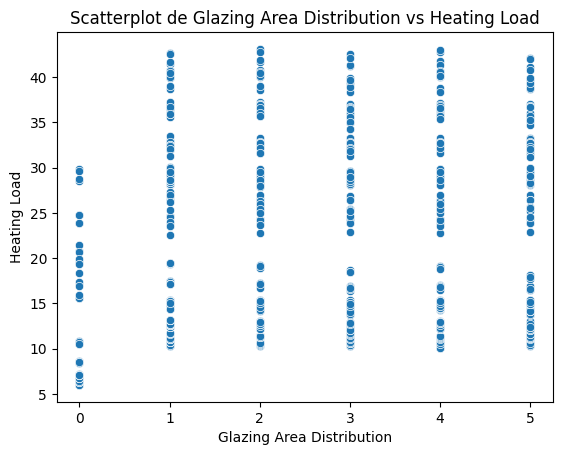

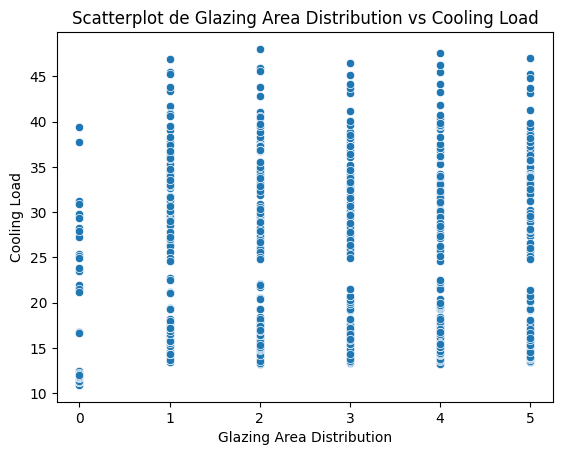

In [97]:
# 1) Creación de la función
def scatterplot(dataset: pd.DataFrame, x: list, y:list):
    import seaborn as sns
    import matplotlib.pyplot as plt
    for i in x:
        for w in y:
            plt.figure()  # Crea una nueva figura para cada gráfico
            sns.scatterplot(data=dataset, x=i, y=w)
            plt.title(f"Scatterplot de {i} vs {w}")  # Agrega un título a cada gráfico
            plt.show()  # Muestra el gráfico y avanza al siguiente

# 2) Ejecución de la función
features_columns = list(dataset.drop(columns=["Heating Load", "Cooling Load"]).columns)
targets= ["Heating Load", "Cooling Load"]

scatterplot(dataset=dataset, x=features_columns, y=targets)

## 3) Tranformación de datos

Aspectos destacables:
  
1) Como se pudo obervar en la etapa de EDA, existen algunas variables númericas que relamente tienen una representación categorica, por tanto es necesario sujetarlos a un proceso de encoding para poder usarlos dentro de nuestros modelos de ML.

2) Dentro de los boxplot no se logro ver ninguna dispersión que conteniera outliers extremadamente atípicos, por lo que no se planteara ningúna metodología de deteción y eliminación de outlieres

3) No se detectaron valores nulos en el set de datos    
4) Dado que es un conjunto de datos de muy poca dimensionalidad, no se buscará realizar ningúna reducción de esta con algúna método de ML

### 3.1) Data split
Antes de cualquier tranformación de datos se realizara la segregación de datos (data split). Dado que es un problema de regresión se optará por usar el método de segregación aleatoria

In [98]:
from sklearn.model_selection import train_test_split

# 1) Aislamiento de los features
features = dataset.drop(columns=["Heating Load", "Cooling Load"])

# 2) Aislamiento de las variables objetivo
cooling_target = dataset[["Cooling Load"]]
heating_target = dataset[["Heating Load"]]

# 1) Segregación para el cooling
X_train, X_test, cooling_train, cooling_test = train_test_split(features, cooling_target, test_size=0.2, random_state=42)

# 2) Segregación para el heating
X_train, X_test, heating_train, heating_test = train_test_split(features, heating_target, test_size=0.2, random_state=42)
print("Cantidad de filas en el set de datos de entrenamiento:", len(X_train))
X_train.head(n=5)

Cantidad de filas en el set de datos de entrenamiento: 614


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution
60,0.82,612.5,318.5,147.0,7.0,2,0.10,1
618,0.64,784.0,343.0,220.5,3.5,4,0.40,2
346,0.86,588.0,294.0,147.0,7.0,4,0.25,2
294,0.90,563.5,318.5,122.5,7.0,4,0.25,1
231,0.66,759.5,318.5,220.5,3.5,5,0.10,4


### 3.2) Escalamiento de variables  numéricas
Se realizará un escalamiento las fetures consideradas numéricas. Como se puede observar existen distintas escalas en el conjuto de datos numericos. En esta sección se escalaran

In [99]:
# 1) Aislamiento de variables numéricas
numeric_features = X_train[["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area"]]

# 2) Escalamiento
from sklearn.preprocessing import StandardScaler

# 2.1) Importamos el objeto scaler
scaler = StandardScaler()

# 2.2) Relizamos la tranformacion
scaled_data = scaler.fit_transform(X=numeric_features)

# 3. Convertir el array escalado en un DataFrame nuevamente, con los mismos nombres de columnas
scaled_dataset = pd.DataFrame(data=scaled_data, columns=numeric_features.columns)
scaled_dataset

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area
0,0.553671,-0.696222,-0.007372,-0.679048
1,-1.155118,1.250664,0.558439,0.957063
2,0.933402,-0.974349,-0.573184,-0.679048
3,1.313133,-1.252476,-0.007372,-1.224418
4,-0.965252,0.972537,-0.007372,0.957063
...,...,...,...,...
609,-0.015925,-0.139969,2.255873,-1.224418
610,0.933402,-0.974349,-0.573184,-0.679048
611,-0.490589,0.416284,-1.138995,0.957063
612,2.072594,-1.808729,-0.573184,-1.497103


**NOTE:** You need to save the scaler object after fitting it on your training dataset, so you can reuse the same transformation parameters (mean, standard deviation, etc.) on your production dataset. This ensures that your production data is transformed consistently, just like the training data.

### 3.3) Encoding
Utilizamore el binary encoding para que no se aumente mucho la dimensionalidad del set de datos

In [100]:
!pip install category_encoders

In [101]:
import category_encoders as ce

# 1) Variables categoricas
categorical_variables = X_train.drop(columns =list(scaled_dataset.columns)) # Eliminamos las variables numericas

# 2) Crear el codificador de Binary Encoding
encoder = ce.BinaryEncoder(cols=list(categorical_variables.columns))

# Ajustar y transformar los datos
categorical_variables = encoder.fit_transform(X=categorical_variables)
categorical_variables

,Overall_Height_0,Overall_Height_1,Orientation_0,Orientation_1,Orientation_2,Glazing Area_0,Glazing Area_1,Glazing Area_2,Glazing Area Distribution_0,Glazing Area Distribution_1,Glazing Area Distribution_2
60,0,1,0,0,1,0,0,1,0,0,1
618,1,0,0,1,0,0,1,0,0,1,0
346,0,1,0,1,0,0,1,1,0,1,0
294,0,1,0,1,0,0,1,1,0,0,1
231,1,0,0,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,0,1,1,0,0,1,0,0,1
106,0,1,0,1,0,0,0,1,0,1,0
270,1,0,0,1,0,0,0,1,1,0,1
435,0,1,0,1,1,0,1,1,0,1,1


**UNION DE DATOS**

In [102]:
# 1) Reseteo del indice de los pandas DF
scaled_dataset.reset_index(drop=True, inplace=True)
categorical_variables.reset_index(drop=True, inplace=True)
X_train = pd.concat(objs=[scaled_dataset, categorical_variables], axis=1)
X_train

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height_0,Overall_Height_1,Orientation_0,Orientation_1,Orientation_2,Glazing Area_0,Glazing Area_1,Glazing Area_2,Glazing Area Distribution_0,Glazing Area Distribution_1,Glazing Area Distribution_2
0,0.553671,-0.696222,-0.007372,-0.679048,0,1,0,0,1,0,0,1,0,0,1
1,-1.155118,1.250664,0.558439,0.957063,1,0,0,1,0,0,1,0,0,1,0
2,0.933402,-0.974349,-0.573184,-0.679048,0,1,0,1,0,0,1,1,0,1,0
3,1.313133,-1.252476,-0.007372,-1.224418,0,1,0,1,0,0,1,1,0,0,1
4,-0.965252,0.972537,-0.007372,0.957063,1,0,0,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.015925,-0.139969,2.255873,-1.224418,0,1,0,1,1,0,0,1,0,0,1
610,0.933402,-0.974349,-0.573184,-0.679048,0,1,0,1,0,0,0,1,0,1,0
611,-0.490589,0.416284,-1.138995,0.957063,1,0,0,1,0,0,0,1,1,0,1
612,2.072594,-1.808729,-0.573184,-1.497103,0,1,0,1,1,0,1,1,0,1,1


## 4) Desarrollo del modelo ML
Se exploraran los siguientes modelos:

- Linear regression  
- Random forest
- Xbgoost

Adicionalmente, se hará una experimentación con los modelos. Usando la herramienta de MLflow.

 ### 4.1) Entrenamiento y evaluación de modelos tentativos

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#### 4.1.1) Configuración del servidor de MLflow

**INTEGRACION DE MLFLOW A LA EJECUCION**

Antes de la creación del experimento y sus ejecuciones, es necesario espesificar donde se almacenaran los datos generados.
Sino se espesifica Mlflow creará automaticamente una carpeta llamada mlrun donde contenrá toda la información relacionada a la ejecución del experimento.

Por esta razón ejecutamos el siguiente comando:

 **MLflow Server Command:**

```bash
mlflow server \
  --backend-store-uri sqlite:////home/jupyter/mlruns.db \
  --default-artifact-root gs://mlflow_mlops \
  -h 0.0.0.0 -p 5000
```

**Explanation:**

1. **`--backend-store-uri sqlite:////home/jupyter/mlruns.db`**:
   - This stores all experiment metadata (parameters, metrics, tags, etc.) in a **SQLite database file** at `/home/jupyter/mlruns.db`.
   - Note the **four slashes (`////`)** after `sqlite:`:
     - The **first three slashes** denote the URI scheme for an absolute path.
     - The **fourth slash** begins the absolute path to the `mlruns.db` file.

2. **`--default-artifact-root gs://mlflow_mlops`**:
   - This sets the **default location** to store artifacts (such as models and logs) in the **Google Cloud Storage bucket** `gs://mlflow_mlops`.

3. **`-h 0.0.0.0`**:
   - Makes the MLflow UI accessible from any IP address (useful in VM or cloud environments).

4. **`-p 5000`**:
   - Runs the MLflow UI on **port 5000**.

---

**NOTE:**

You need to start the MLflow server first before running your script. Here's why:

Start the MLflow Server: The command you provided starts the MLflow tracking server, which is responsible for logging experiments, runs, metrics, and artifacts. By executing the previous command.  You're setting up the server to listen on port 5000 and specifying where to store the backend data and artifacts. This server needs to be running and accessible before your script attempts to communicate with it.

#### 4.1.2) Configuración del experimento

In [104]:
!pip install mlflow

In [105]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# You need to set the tracking URI before setting the experiment. This ensures that any experiments or runs are created on the remote server you're pointing to.
# Set the tracking URI first
mlflow.set_tracking_uri("http://34.19.74.232:5000/") # Aca basicamente le indico la direccion (IP y puerto) el servidor web.
#El servidor web a su vez puede estar configurado para que almacene localmente en una base de daatos SQLite como es este caso las metricas o que lo haga en una base de datos como postreSQL.

# Enable autologging for all supported libraries
mlflow.autolog()

# Acá espesifico el nombre del experiemnto, sino existe lo crea. Cada experimento puede contener multiples ejecuciones.
mlflow.set_experiment("Orlando Energy Efficient")

# Add tags, such as the user
mlflow.set_tag("user", "orlando.barraza")

2024/10/20 21:49:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/10/20 21:49:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/10/20 21:49:43 WARNING mlflow.utils.autologging_utils: MLflow statsmodels autologging is known to be compatible with 0.11.1 <= statsmodels <= 0.14.3, but the installed version is 0.14.4. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a compatible version, or try upgrading MLflow.
2024/10/20 21:49:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/10/20 21:49:43 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2024/10/20 21:49:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


In [106]:
# 1) Function to train and evaluate models
def train_and_evaluate_models(X: pd.DataFrame, y: pd.DataFrame):

    # End any active run
    if mlflow.active_run():
        mlflow.end_run()

    # Define models in a dictionary
    model_dict = {
        "Linear Regression": LinearRegression(n_jobs=-1),
        "Random Forest": RandomForestRegressor(n_estimators=100, n_jobs=-1),
        "XGBoost": XGBRegressor(n_estimators=100, use_label_encoder=False, eval_metric='rmse')
    }

    results = {}  # Store validation results

    for model_name, model in model_dict.items():
        # Create a dynamic run name using the model name and current date/time
        run_name = f"{model_name} {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}"

        # Start a new MLflow run
        with mlflow.start_run(run_name=run_name):
            # Perform cross-validation
            cv_scores = cross_val_score(
                estimator=model, X=X, y=y, cv=5,
                scoring='r2', n_jobs=-1
            )

            # Store the results in a dictionary for reference
            results[model_name] = cv_scores

    return results

In [107]:
%%time
# 2) Ejecución de la funcion
resultados = train_and_evaluate_models(X=X_train, y=cooling_train)
resultados

2024/10/20 21:49:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run treasured-donkey-51 at: http://34.19.74.232:5000/#/experiments/3/runs/193b0e3daa4c43b190559210878b557b.
2024/10/20 21:49:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://34.19.74.232:5000/#/experiments/3.
2024/10/20 21:49:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Linear Regression 2024-10-20 21:49:44 at: http://34.19.74.232:5000/#/experiments/3/runs/8f1ff6b2a7f4408491c9beeed35ade93.
2024/10/20 21:49:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://34.19.74.232:5000/#/experiments/3.
2024/10/20 21:49:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest 2024-10-20 21:49:50 at: http://34.19.74.232:5000/#/experiments/3/runs/a8310ea474d741e2b11ee0ed65c0a081.
2024/10/20 21:49:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://34.19.74.232:5000/#/experiments/3.
2024/10/20 21:49:53 INFO mlfl

CPU times: user 255 ms, sys: 88.5 ms, total: 343 ms
Wall time: 9.63 s


{'Linear Regression': array([0.89145326, 0.8853618 , 0.88288568, 0.88256555, 0.8692494 ]),
 'Random Forest': array([0.96432139, 0.97067172, 0.96883381, 0.95799132, 0.95522472]),
 'XGBoost': array([0.98245698, 0.98321533, 0.98182321, 0.98253947, 0.98857468])}

**Media R2 por modelo**

In [108]:
for i in resultados:
    media = resultados[i].mean()
    print(f"Media del R2 del modelo {i}:", media)

Media del R2 del modelo Linear Regression: 0.8823031369847584
Media del R2 del modelo Random Forest: 0.9634085915564132
Media del R2 del modelo XGBoost: 0.983721935749054


**VISUALIZACION DE RESULTADOS**

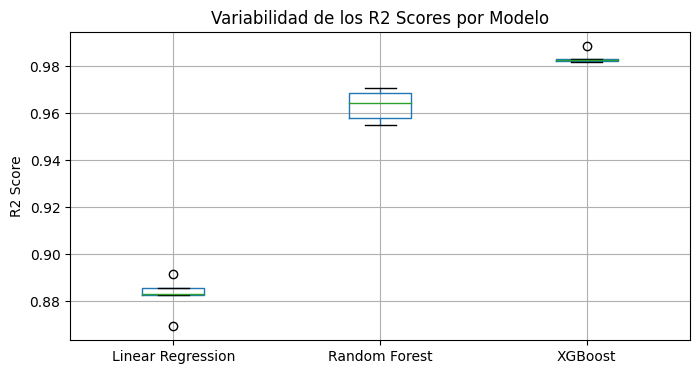

In [109]:
# Visualizacion de resultados por modelo
# Convertir los resultados en un DataFrame para facilitar la visualización
results_df = pd.DataFrame(data=resultados)

# Generar el boxplot para visualizar la variabilidad de los resultados
plt.figure(figsize=(8, 4))
results_df.boxplot()
plt.title("Variabilidad de los R2 Scores por Modelo")
plt.ylabel("R2 Score")
plt.show()

### 4.2) Tueno de mejor modelo
Como se pudo observar en la visualización anterior el modelo con menor variabilidad de presición y mayor presición es el de Xgboost, con una media del 98%

In [110]:
%%time
from sklearn.model_selection import GridSearchCV

# Definir el modelo de XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir los hiperparámetros que queremos probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Definir el GridSearchCV con la métrica de R2
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',  # Usar R² como métrica
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,     # Usar todos los núcleos disponibles
    verbose=1      # Mostrar el proceso
)

# Ajustar el modelo con el ajuste de hiperparámetros
grid_search.fit(X=X_train, y =cooling_train)

# Nos quedmos con el mejor modelo
best_model = grid_search.best_estimator_

# Mostrar los mejores hiperparámetros encontrados y el puntaje asociado
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R²:", grid_search.best_score_)

2024/10/20 21:49:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '39099ae23a1f4319b0084234ccd29b82', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/10/20 21:49:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https:/

Fitting 5 folds for each of 108 candidates, totalling 540 fits


2024/10/20 21:50:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run awesome-auk-715 at: http://34.19.74.232:5000/#/experiments/3/runs/39099ae23a1f4319b0084234ccd29b82.
2024/10/20 21:50:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://34.19.74.232:5000/#/experiments/3.
2024/10/20 21:50:49 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7dbf00569e40>)


Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Mejor R²: 0.9867360830307007
CPU times: user 2.57 s, sys: 131 ms, total: 2.7 s
Wall time: 55.6 s


Como se puede observar el valo de R2 mejoro ligeramente con respecto a la media de la ejecución anterior.

### 4.3) Testing
En esta sección se va a hacer le evaluación final del modelo utilizando el set de datos de testing original. Concretamente se van a utilizar junto con curvas de validación para observar si existe algun fenómeno de overfitting  

**NUMERIC TRANFORMATION**

Recordemos que el set de datos de testeo no ha pasado por el proceso de tranformación al que fue sujeto el set de datos entrenamiento
por lo que se le tendrá que aplicar las mismas tranformaciones

In [111]:
X_test_numeric = X_test [["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area"]]
X_test_numeric

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area
668,0.62,808.5,367.5,220.50
324,0.66,759.5,318.5,220.50
624,0.98,514.5,294.0,110.25
690,0.79,637.0,343.0,147.00
473,0.64,784.0,343.0,220.50
...,...,...,...,...
355,0.79,637.0,343.0,147.00
534,0.90,563.5,318.5,122.50
344,0.86,588.0,294.0,147.00
296,0.86,588.0,294.0,147.00


In [112]:
X_test_numeric_tranformed = scaler.transform(X_test_numeric)
X_test_numeric_tranformed = pd.DataFrame(data = X_test_numeric_tranformed,
                                 columns =["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area"])
X_test_numeric_tranformed

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area
0,-1.344983,1.528790,1.124251,0.957063
1,-0.965252,0.972537,-0.007372,0.957063
2,2.072594,-1.808729,-0.573184,-1.497103
3,0.268873,-0.418096,0.558439,-0.679048
4,-1.155118,1.250664,0.558439,0.957063
...,...,...,...,...
149,0.268873,-0.418096,0.558439,-0.679048
150,1.313133,-1.252476,-0.007372,-1.224418
151,0.933402,-0.974349,-0.573184,-0.679048
152,0.933402,-0.974349,-0.573184,-0.679048


**ENCODING TRANFORMATION**

In [113]:
X_test_categorical = X_test.drop(columns= list(X_test_numeric_tranformed.columns))
X_test_categorical

,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution
668,3.5,2,0.40,3
324,3.5,2,0.25,1
624,7.0,2,0.40,3
690,7.0,4,0.40,4
473,3.5,3,0.25,4
...,...,...,...,...
355,7.0,5,0.25,2
534,7.0,4,0.40,1
344,7.0,2,0.25,2
296,7.0,2,0.25,1


In [114]:
# Ajustar y transformar los datos
X_test_categorical = encoder.fit_transform(X=X_test_categorical)
X_test_categorical

,Overall_Height_0,Overall_Height_1,Orientation_0,Orientation_1,Orientation_2,Glazing Area_0,Glazing Area_1,Glazing Area_2,Glazing Area Distribution_0,Glazing Area Distribution_1,Glazing Area Distribution_2
668,0,1,0,0,1,0,0,1,0,0,1
324,0,1,0,0,1,0,1,0,0,1,0
624,1,0,0,0,1,0,0,1,0,0,1
690,1,0,0,1,0,0,0,1,0,1,1
473,0,1,0,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
355,1,0,1,0,0,0,1,0,1,0,0
534,1,0,0,1,0,0,0,1,0,1,0
344,1,0,0,0,1,0,1,0,1,0,0
296,1,0,0,0,1,0,1,0,0,1,0


**UNION DE DATOS**

In [115]:
# 1) Reseteo del indice de los pandas DF
X_test_numeric_tranformed.reset_index(drop=True, inplace=True)
X_test_categorical.reset_index(drop=True, inplace=True)


# 2) Union de los datos
X_test = pd.concat(objs=[X_test_numeric_tranformed, X_test_categorical], axis=1)
X_test

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height_0,Overall_Height_1,Orientation_0,Orientation_1,Orientation_2,Glazing Area_0,Glazing Area_1,Glazing Area_2,Glazing Area Distribution_0,Glazing Area Distribution_1,Glazing Area Distribution_2
0,-1.344983,1.528790,1.124251,0.957063,0,1,0,0,1,0,0,1,0,0,1
1,-0.965252,0.972537,-0.007372,0.957063,0,1,0,0,1,0,1,0,0,1,0
2,2.072594,-1.808729,-0.573184,-1.497103,1,0,0,0,1,0,0,1,0,0,1
3,0.268873,-0.418096,0.558439,-0.679048,1,0,0,1,0,0,0,1,0,1,1
4,-1.155118,1.250664,0.558439,0.957063,0,1,0,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.268873,-0.418096,0.558439,-0.679048,1,0,1,0,0,0,1,0,1,0,0
150,1.313133,-1.252476,-0.007372,-1.224418,1,0,0,1,0,0,0,1,0,1,0
151,0.933402,-0.974349,-0.573184,-0.679048,1,0,0,0,1,0,1,0,1,0,0
152,0.933402,-0.974349,-0.573184,-0.679048,1,0,0,0,1,0,1,0,0,1,0


**X_test prediction**

In [116]:
best_model = grid_search.best_estimator_

In [117]:
y_pred = best_model.predict(X_test)
y_pred = pd.DataFrame (data=y_pred, columns =["Predictions"])
y_pred

,Predictions
0,14.339095
1,17.801950
2,26.571280
3,40.097103
4,22.214676
...,...
149,44.264805
150,29.596313
151,35.382172
152,35.638744


In [118]:
from sklearn.metrics import mean_squared_error, r2_score

# 4. Evaluate the model's performance using the test set
mse = mean_squared_error(cooling_test, y_pred)
r2 = r2_score(cooling_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 12.861125743774895
R2 Score: 0.861196748575318



## Creamos el archivo MODEL para el API <br>
---



In [119]:
import pickle

# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model , file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

Ypredict = pickle_model.predict(X_test)

In [125]:
config = {
    'Relative_Compactness': [-1.344983],
    'Surface_Area': [1.528790],
    'Wall_Area': [1.124251],
    'Roof_Area': [0.957063],
    'Overall_Height_0': [0],
    'Overall_Height_1': [1],
    'Orientation_0': [0],
    'Orientation_1': [0],
    'Orientation_2': [1],
    'Glazing Area_0': [0],
    'Glazing Area_1': [0],
    'Glazing Area_2': [1],
    'Glazing Area Distribution_0': [0],
    'Glazing Area Distribution_1': [0],
    'Glazing Area Distribution_2': [1]
}

In [127]:
def predict_mpg(config, model):
    ##loading the model from the saved file
    pkl_filename = "model.pkl"
    with open(pkl_filename, 'rb') as f_in:
        model = pickle.load(f_in)

    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config

    y_pred = model.predict(df)
    return y_pred

In [128]:
##loading the model from the saved file
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predictValue = predict_mpg(config, model)
predictValue

array([14.339095], dtype=float32)